## Covid Visualization and Prediction

### Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Reading the covid dataset

In [2]:
covid_data = pd.read_csv('owid-covid-data.csv')

### Printing first few columns

In [3]:
covid_data.head()

iso_code      continent location        date  total_cases  new_cases  \
0      ABW  North America    Aruba  2020-03-13          2.0        2.0   
1      ABW  North America    Aruba  2020-03-19          NaN        NaN   
2      ABW  North America    Aruba  2020-03-20          4.0        2.0   
3      ABW  North America    Aruba  2020-03-21          NaN        NaN   
4      ABW  North America    Aruba  2020-03-22          NaN        NaN   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1               0.286           NaN         NaN                  0.0  ...   
2               0.286           0.0         0.0                  0.0  ...   
3               0.286           NaN         NaN                  0.0  ...   
4               0.286           NaN         NaN                  0.0  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0       35973.781              NaN                    NaN   
1       35973.781              NaN                    NaN   
2       35973.781              NaN                    NaN   
3       35973.781              NaN                    NaN   
4       35973.781              NaN                    NaN   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                11.62             NaN           NaN                     NaN   
1                11.62             NaN           NaN                     NaN   
2                11.62             NaN           NaN                     NaN   
3                11.62             NaN           NaN                     NaN   
4                11.62             NaN           NaN                     NaN   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         NaN            76.29                      NaN  
1                         NaN            76.29                      NaN  
2                         NaN            76.29                      NaN  
3                         NaN            76.29                      NaN  
4                         NaN            76.29                      NaN  

[5 rows x 41 columns]

### Visualizing covid spread versus time

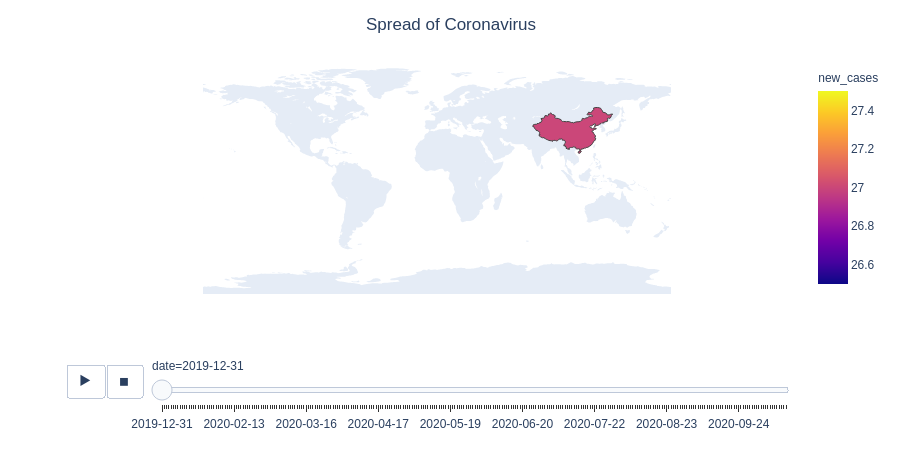

In [4]:
covid_data_countrydate = covid_data[covid_data['new_cases']>0]
covid_data_countrydate = covid_data_countrydate.groupby(['date','location']).sum().reset_index()

fig = px.choropleth(covid_data_countrydate, 
                    locations="location", 
                    locationmode = "country names",
                    color="new_cases", 
                    hover_name="location", 
                    animation_frame="date"
                   )

fig.update_layout(
    title_text = 'Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()

### Selecting only Asia region

In [5]:
covid_data1=covid_data.loc[covid_data['continent'] == 'Asia']

### Grouping by data & location whose corona cases > 0

In [6]:
covid = covid_data1.groupby(['location', 'date']).max().reset_index().sort_values('date', ascending=False)
covid = covid.drop_duplicates(subset = ['location'])
covid = covid[covid['total_cases']>0]

### Visualizing Corona Cases on October 13 in Asia Region

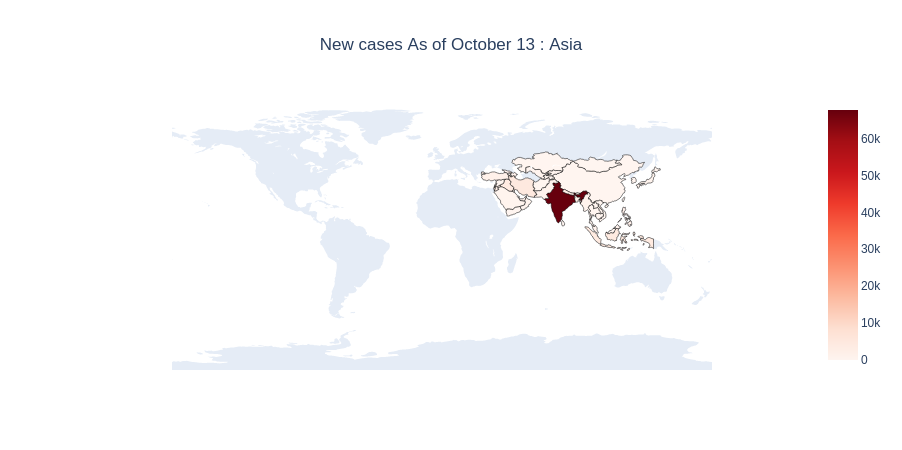

In [7]:
fig = go.Figure(data=go.Choropleth(
    locations = covid['location'],
    locationmode = 'country names',
    z = covid['new_cases'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5
))

fig.update_layout(
    title_text = 'New cases As of October 13 : Asia',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

### Visualizing covid cases in other countries except India

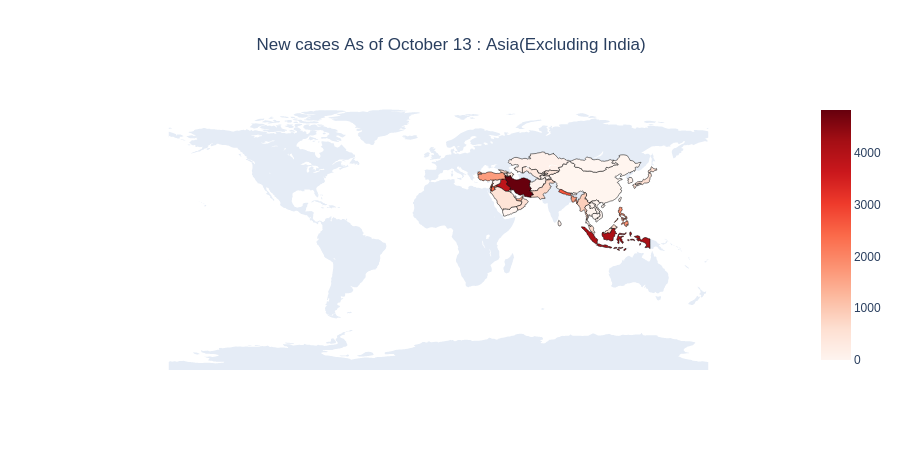

In [8]:
df_no_india = covid[covid['location'] != 'India']
fig = go.Figure(data=go.Choropleth(
    locations = df_no_india['location'],
    locationmode = 'country names',
    z = df_no_india['new_cases'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5
))

fig.update_layout(
    title_text = 'New cases As of October 13 : Asia(Excluding India)',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

### Visualizing daily covid cases in Nepal

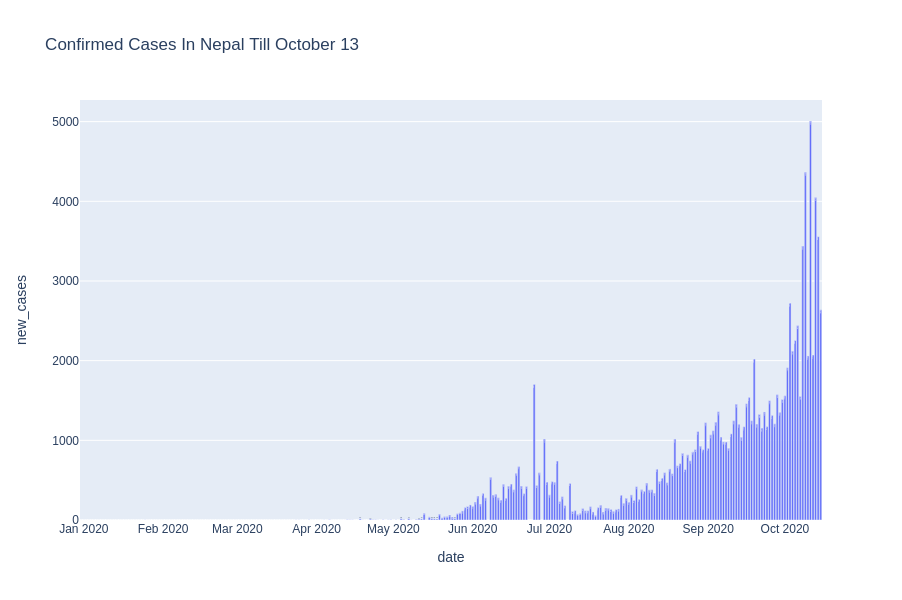

In [9]:
df=covid_data.loc[covid_data['location'] == 'Nepal']
bar_data = df.groupby(['date'])['new_cases'].sum().reset_index().sort_values('date', ascending=True)

fig = px.bar(bar_data, x="date", y="new_cases", text = 'new_cases', orientation='v', height=600,
             title='Confirmed Cases In Nepal Till October 13')
fig.show()

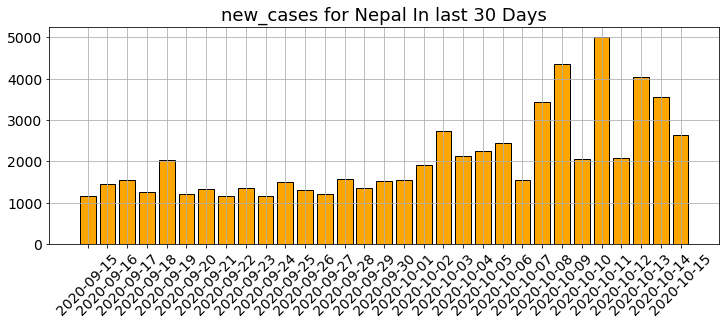

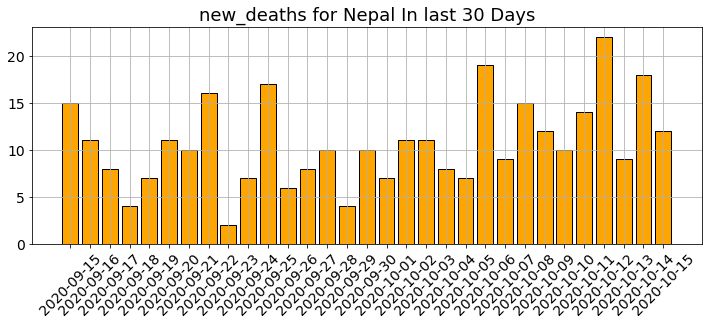

In [10]:
def plot_var(var='new_deaths',
             location='Nepal'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(location)==str, "Expected string as the state name"
    
    y = df[df['location']==location][var][-31:]
    x = df[df['location']==location]['date'][-31:]
    plt.figure(figsize=(12,4))
    plt.title("{} for {} In last 30 Days".format(var,location),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

plot_var('new_cases')
plot_var('new_deaths')

### Growth of total covid cases in Nepal

<ipython-input-15-67ba017901ac>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:title={'center':'Cases of COVID-19 In Nepal'}, xlabel='Date', ylabel='Total Cases'>

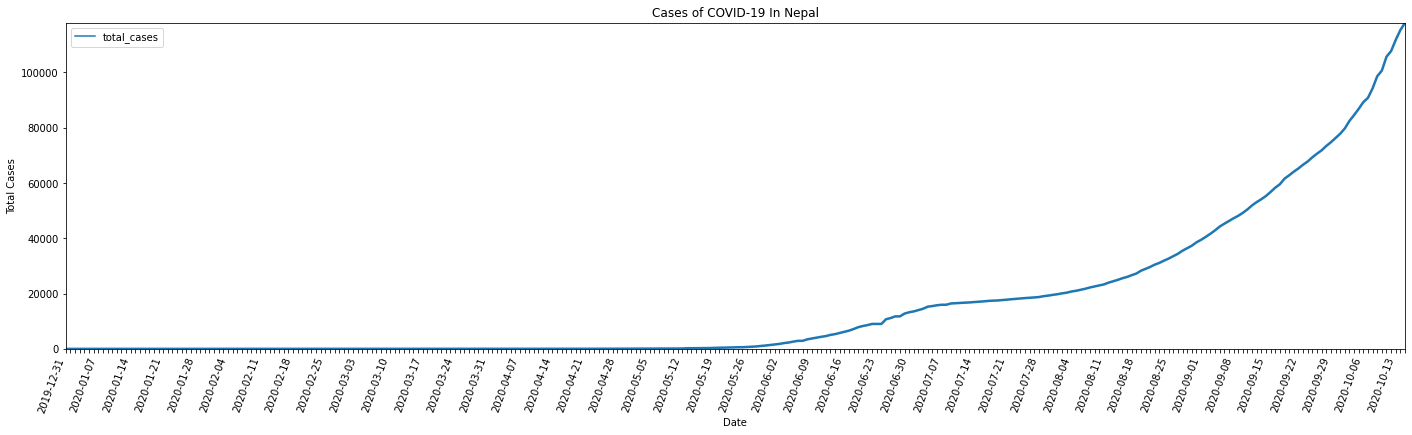

In [15]:
covid_data = pd.read_csv('owid-covid-data.csv')
df=covid_data.loc[covid_data['location'] == 'Nepal']
df = df[['continent','location', 'date','new_cases','new_deaths','total_cases','total_deaths']]
df.fillna(0)
covidByDay =df.groupby(['date'])[['total_cases']].sum().sort_values('date', ascending=True)

labels = covidByDay.index.get_level_values(0).values
plt.figure(figsize=(24, 6))
ax = sns.lineplot(data=covidByDay, palette="tab10", linewidth=2.5)
ax.set_xticklabels(labels, rotation=70, horizontalalignment='right')
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
ax.set_title('Cases of COVID-19 In Nepal')
ax.margins(0)

n = 7  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax

### Predicting Future Covid Cases in Nepal

In [16]:
df = df[df['total_cases'] > 10000]

ar=list(range(1,114))
df.insert(0,"SN",ar,True)

#### Preparing Dataset

In [17]:
x1 = np.array(df["SN"]).reshape(-1,1)
y = np.array(df['total_cases']).reshape(-1,1)

#### Importing necessary libraries

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#### Model training

In [23]:
print('--'*15,end ='');print('polynomial model training',end ='');print('--'*10)

for i in range(1,6):
    polyfet = PolynomialFeatures(degree=i)
    xa = polyfet.fit_transform(x1)
    model = linear_model.LinearRegression()
    model.fit(xa,y)
    accuracy = model.score(xa,y)
    print('accuracy(R2) with degree_{} is -->  {}%'.format(i , round(accuracy*100,3)))
print('--'*45)

------------------------------polynomial model training--------------------
accuracy(R2) with degree_1 is -->  85.744%
accuracy(R2) with degree_2 is -->  99.001%
accuracy(R2) with degree_3 is -->  99.754%
accuracy(R2) with degree_4 is -->  99.758%
accuracy(R2) with degree_5 is -->  99.941%
------------------------------------------------------------------------------------------


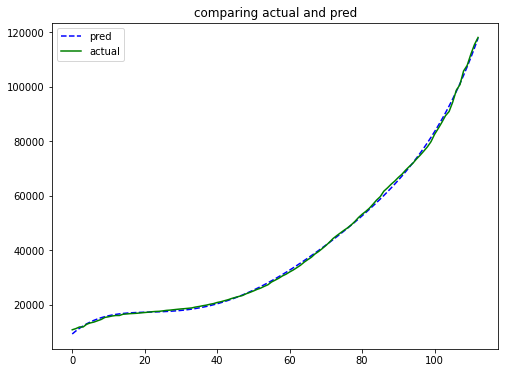

In [26]:
polyfet = PolynomialFeatures(degree=5) #you can change degree
xa = polyfet.fit_transform(x1)
model = linear_model.LinearRegression()
model.fit(xa,y)
yp = model.predict(xa)
yact = np.array(df['total_cases'])#.reshape(-1,1)

plt.figure(figsize=(8, 6)) 
plt.plot(yp,"--b")
plt.plot(yact,"-g")
plt.legend(['pred', 'actual'])
plt.xticks()
# plt.yticks([])
plt.title("comparing actual and pred", fontdict=None, loc='center')
plt.show()

#### Predicting Future Cases in Nepal

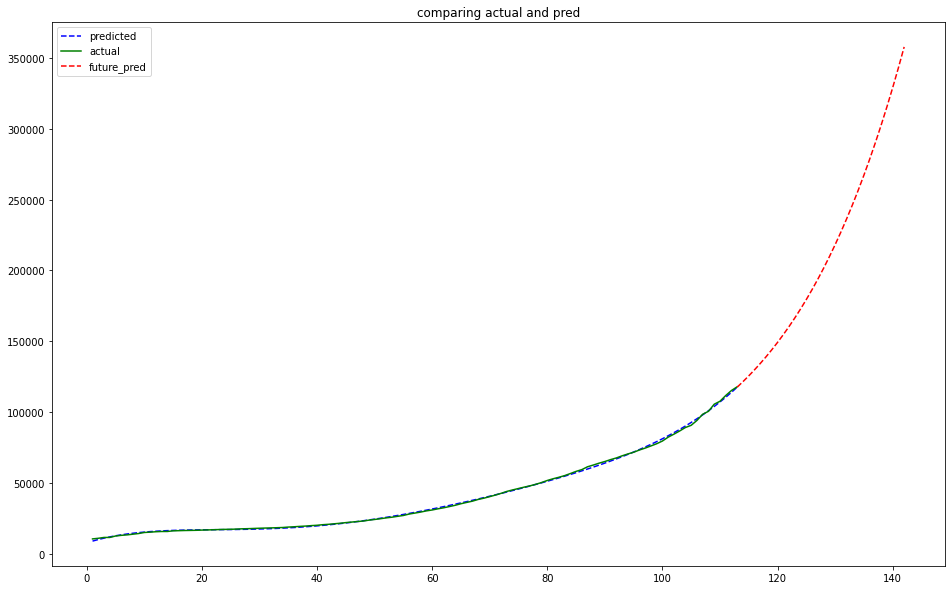

In [27]:
x_fut = np.arange(30).reshape(-1,1)
xf = x_fut+x1[-1:]
y_fut = (model.predict(polyfet.transform(xf))).astype(int)

plt.figure(figsize=(16, 10)) 
plt.plot(x1,yp,"--b")
plt.plot(x1,yact,"-g")
plt.plot(xf,y_fut,"--r")
plt.legend(['predicted', 'actual',"future_pred"])
plt.xticks()

plt.title("comparing actual and pred", fontdict=None, loc='center')
plt.show()

#### Predicting Covid Cases after a month

In [35]:
days = 7
print("Corona Cases after {} day : ".format(days), end='')
print(round(int( model.predict(polyfet.transform (np.array(x1[-1:] +days).reshape(-1,1)))),2))

Corona Cases after 7 day : 149251
